In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
X=np.array([[15.5,40],[23.75,23.25],[8,17],[17,21],[5.5,10],[19,12],[24,20],[2.5,12],[7.5,15],[11,26]])
Y=np.array([5,5,2,5,2,2,5,2,2,5])

In [34]:
#Normalization
X_min = X.min(axis=0)
X_max = X.max(axis=0)


X_norm = (X - X_min) / (X_max - X_min)

In [35]:
# Convert Y values to binary classes (e.g., 1 and 0) for the perceptron
Y = np.where(Y == 5, 1, 0)

# Parameters
learning_rate = 0.02
epochs = 100

# Initialize weights and bias
weights = np.zeros(X.shape[1])
bias = 0

# Activation function (step function)
def activation(x):
    return 1 if x >= 0 else 0

# Training loop
for epoch in range(epochs):
    for i in range(len(X_norm)):
        # Linear combination of inputs and weights
        linear_output = np.dot(X_norm[i], weights) + bias
        # Predicted output
        y_pred = activation(linear_output)
        # Update weights and bias
        error = Y[i] - y_pred
        weights += learning_rate * error * X_norm[i]
        bias += learning_rate * error

# Print final weights and bias
print("Weights:", weights)
print("Bias:", bias)

# Predicting
predictions = []
for i in range(len(X_norm)):
    linear_output = np.dot(X_norm[i], weights) + bias
    y_pred = activation(linear_output)
    predictions.append(y_pred)

print("Predictions:", predictions)
print("Actual:", Y)

Weights: [0.0455814  0.04866667]
Bias: -0.04
Predictions: [1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
Actual: [1 1 0 1 0 0 1 0 0 1]


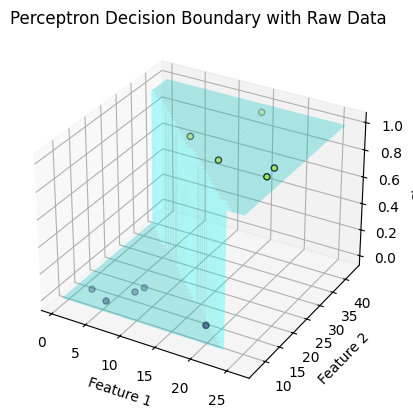

In [36]:
# Generate grid of points for 3D plot (on normalized space)
x_min_norm, x_max_norm = X_norm[:, 0].min() - 0.1, X_norm[:, 0].max() + 0.1
y_min_norm, y_max_norm = X_norm[:, 1].min() - 0.1, X_norm[:, 1].max() + 0.1
xx_norm, yy_norm = np.meshgrid(np.arange(x_min_norm, x_max_norm, 0.01),
                               np.arange(y_min_norm, y_max_norm, 0.01))
grid_norm = np.c_[xx_norm.ravel(), yy_norm.ravel()]

# Predict on each point in the normalized grid
Z_norm = np.array([activation(np.dot(point, weights) + bias) for point in grid_norm])
Z_norm = Z_norm.reshape(xx_norm.shape)

# Recover the grid to original feature scale
xx = xx_norm * (X_max[0] - X_min[0]) + X_min[0]
yy = yy_norm * (X_max[1] - X_min[1]) + X_min[1]

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the decision boundary surface (use normalized decision boundary)
ax.plot_surface(xx, yy, Z_norm, color='cyan', alpha=0.3, edgecolor='none')

# Scatter plot of the original (raw) data points
ax.scatter(X[:, 0], X[:, 1], Y, c=Y, cmap='viridis', edgecolor='k')

# Labels
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Class")
ax.set_title("Perceptron Decision Boundary with Raw Data")

plt.show()